In [51]:
# This notebook accompnaies the soccer sentiment analysis project

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import ast

# 1. Load the data
df = pd.read_csv('grouped_match_data.csv')

#  Check structure
# print(df.head())
# print(df.info())
# print(df.columns)


Confusion Matrix:
 [[39 18]
 [25 14]]

Classification Report:
               precision    recall  f1-score   support

        Lost       0.61      0.68      0.64        57
         Won       0.44      0.36      0.39        39

    accuracy                           0.55        96
   macro avg       0.52      0.52      0.52        96
weighted avg       0.54      0.55      0.54        96



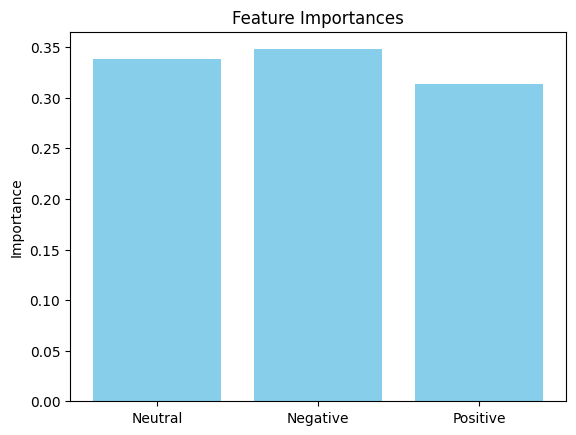

In [58]:
# 2. Convert sentiment string to dictionary
df['sentiment_dict'] = df['s_e_n_t_i_m_e_n_t___d_i_s_t'].apply(ast.literal_eval)

# 3. Extract sentiment values into new columns
df['Neutral'] = df['sentiment_dict'].apply(lambda x: x.get('Neutral', 0))
df['Negative'] = df['sentiment_dict'].apply(lambda x: x.get('Negative', 0))
df['Positive'] = df['sentiment_dict'].apply(lambda x: x.get('Positive', 0))

# 4. Drop the original sentiment columns
# df.drop(['s_e_n_t_i_m_e_n_t___d_i_s_t', 'sentiment_dict'], axis=1, inplace=True)

# 5. Encode match result (Win, Draw, Loss → numeric classes)
label_encoder = LabelEncoder()
df['result_encoded'] = label_encoder.fit_transform(df['W_i_n_n_e_r'])

# 6. Prepare features and target
sentiment_cols = ['Neutral', 'Negative', 'Positive']
X = df[sentiment_cols]
y = df['result_encoded']

# 7. Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Train Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 9. Evaluate model
y_pred = clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# 10. Feature importances plot
import matplotlib.pyplot as plt
importances = clf.feature_importances_
plt.bar(sentiment_cols, importances, color='skyblue')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.show()